## COVID-19
### South Korea

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import date, timedelta
import re
import json
import folium
import difflib
%matplotlib inline
plt.style.use('fivethirtyeight')

##### gather data from https://github.com/jihoo-kim/Coronavirus-Dataset

In [23]:
df_patient = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Coronavirus-Dataset/master/patient.csv')
df_patient['age'] = 2020 - df_patient['birth_year']
df_patient

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN


In [ ]:
df_case = pd.read_csv()

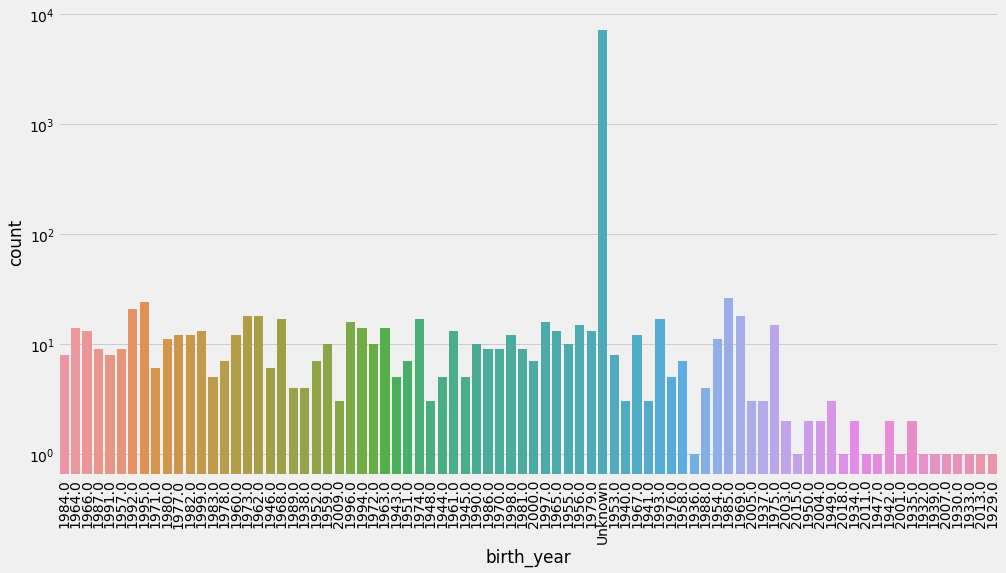

In [3]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df_patient['birth_year'].fillna('Unknown'))
ax.set_yscale('log')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


C:\Users\norma\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


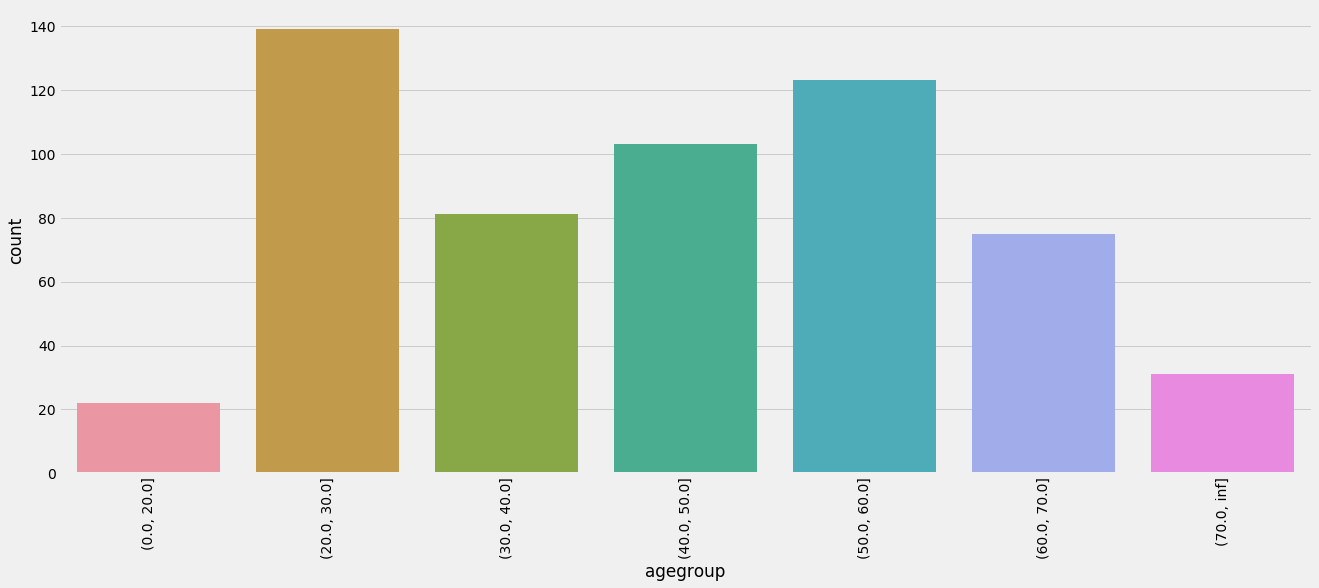

In [24]:
plt.figure(figsize=(20, 8))
plot_data = df_patient[df_patient.state=='isolated']
plot_data['agegroup']= pd.cut(plot_data['age'], bins = [0,20,30, 40, 50, 60, 70, np.inf])
ax = sns.countplot(data=plot_data, x='agegroup')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)